In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [95]:
df = pd.read_csv("newyork_crime_2013.csv").dropna()
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.0
6,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0.0
7,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3.0


In [96]:
df["Population"] = df["Population"].str.replace(",", "")

df["PopulationSq"] = np.square(pd.to_numeric(df["Population"]))
#df["PopulationSq"] = float(df["Population"]) ** 2

In [97]:
df["Murder"] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1,0)

In [98]:
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson',
 'PopulationSq',
 'Murder']

In [99]:
df["RobberyOH"] = np.where(pd.to_numeric(df["Robbery"].str.replace(",", "")) > 0, 1, 0)

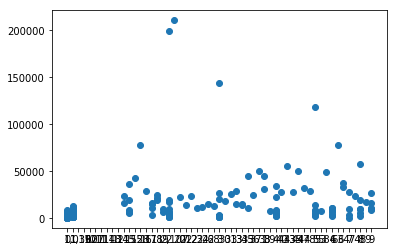

In [100]:
plt.scatter(df["Violent\ncrime"],pd.to_numeric(df["Population"]))

In [137]:
#feature engineering
#from the last assignment, we put together the features population, population squared, murder (binary), burglary(binary  )

#linear regression
df["Property\ncrime"] = df["Property\ncrime"].str.replace(",","") 

from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = df["Property\ncrime"].values.reshape(-1, 1)

X = df[["Population", "PopulationSq", "Murder", "RobberyOH"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

print(regr.fit(X_train, y_train).score(X_test, y_test))

print(regr.fit(X, Y).score(X, Y))

0.708277909553
0.770049563948


In [ ]:
#perhaps some overfitting?